In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setting Style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Data
df = pd.read_csv('/Users/farhanfahim/Documents/Retail-Sales-Forecast-ML/data/processed/processed.csv')
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (700, 16)


,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,1618.5,3.0,20.0,32370.0,0.0,32370.0,16185.0,16185.0,2014-01-01,1,January,2014
1,Government,Germany,Carretera,None,1321.0,3.0,20.0,26420.0,0.0,26420.0,13210.0,13210.0,2014-01-01,1,January,2014
2,Midmarket,France,Carretera,None,2178.0,3.0,15.0,32670.0,0.0,32670.0,21780.0,10890.0,2014-01-06,6,June,2014
3,Midmarket,Germany,Carretera,None,888.0,3.0,15.0,13320.0,0.0,13320.0,8880.0,4440.0,2014-01-06,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470.0,3.0,15.0,37050.0,0.0,37050.0,24700.0,12350.0,2014-01-06,6,June,2014


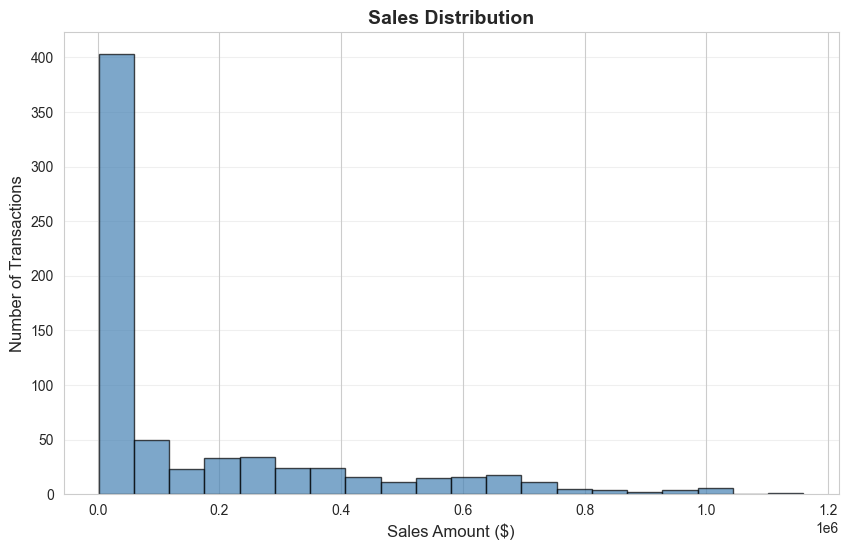

In [10]:
# Sales Distribution

plt.figure(figsize=(10, 6))
plt.hist(df['Sales'], bins=20, edgecolor='black', color='steelblue', alpha=0.7)
plt.xlabel('Sales Amount ($)', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.title('Sales Distribution', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.show()

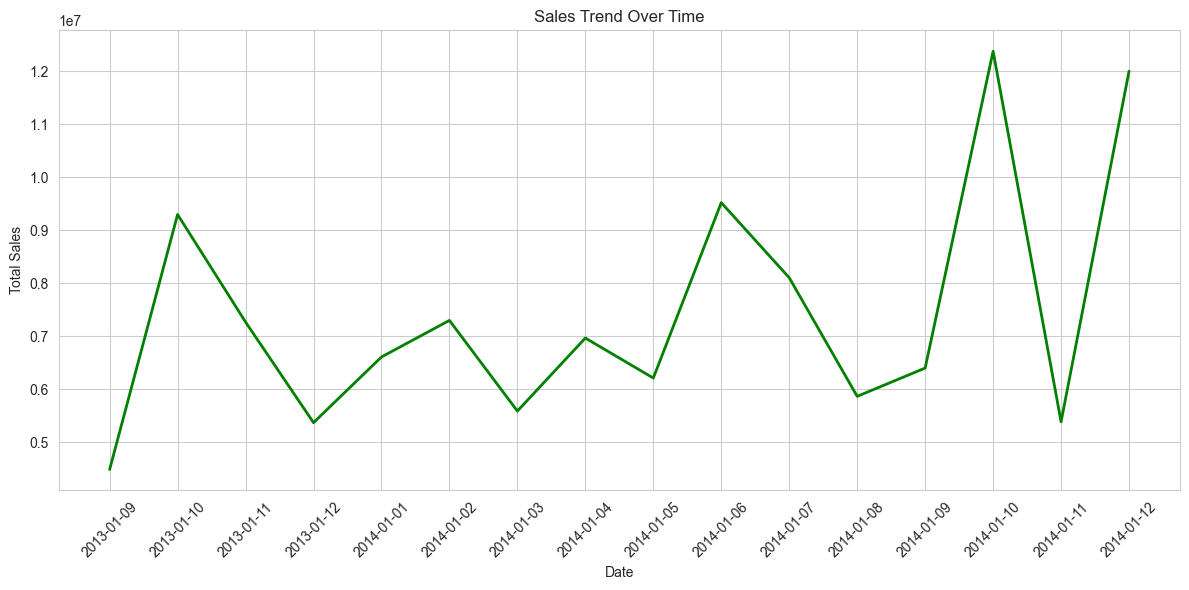

In [11]:
# Sales Overtime 

daily_sales = df.groupby('Date')['Sales'].sum()

plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales.values, color='green', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Sales Trend Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

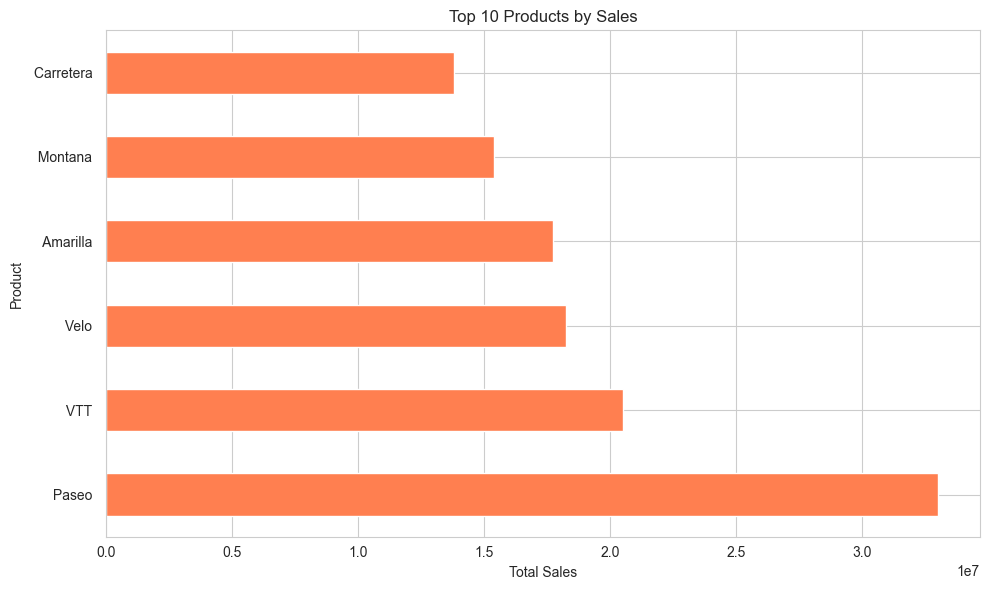

In [12]:
# Top 10 products by sales

product_sales = df.groupby('Product')['Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
product_sales.plot(kind='barh', color='coral')
plt.xlabel('Total Sales')
plt.title('Top 10 Products by Sales')
plt.tight_layout()
plt.show()

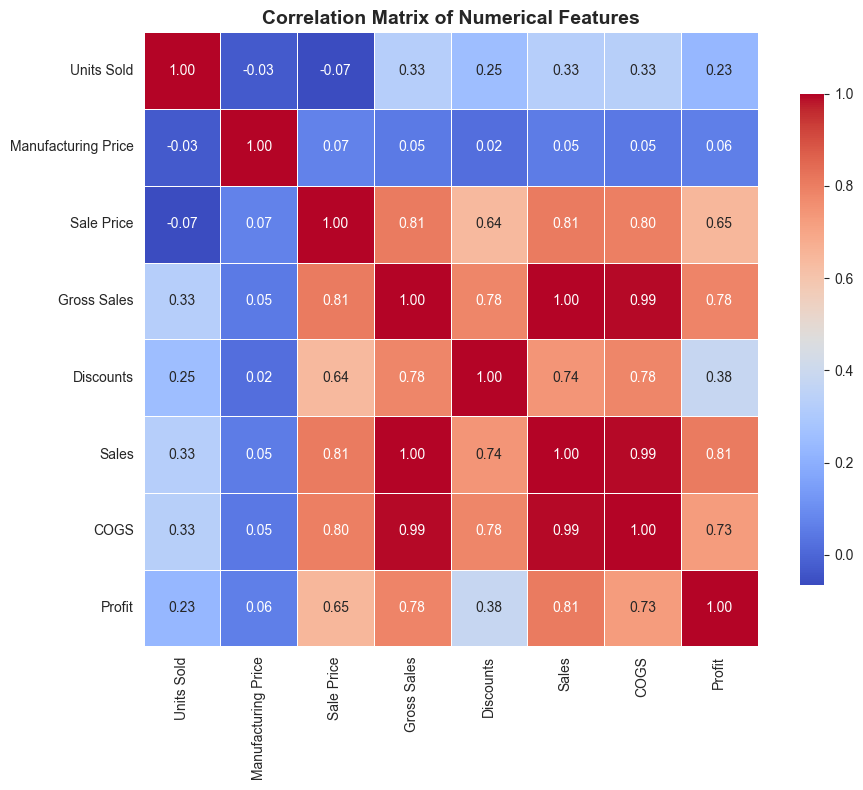

In [14]:
# Creating a correlation heatmap which will help me in the ML part 

numeric_cols = ['Units Sold', 'Manufacturing Price', 'Sale Price', 
                'Gross Sales', 'Discounts', 'Sales', 'COGS', 'Profit']

correlation = df[numeric_cols].corr()

# Creating heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Numerical Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

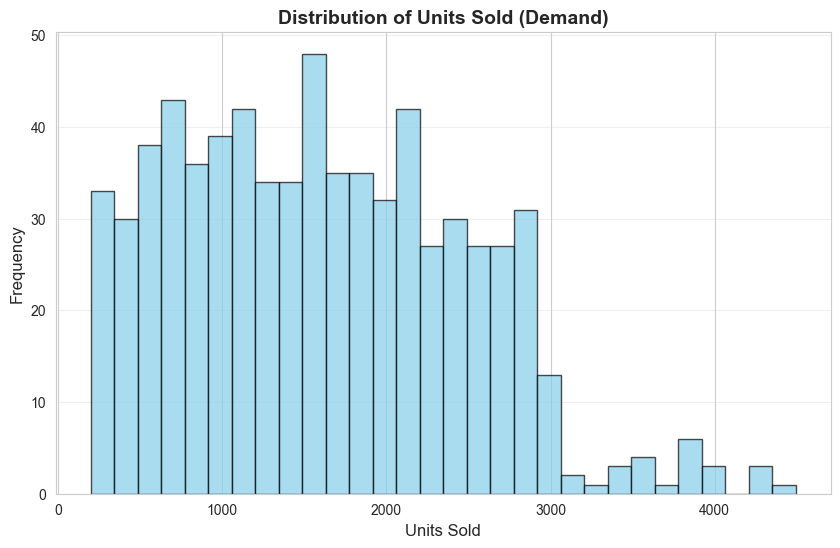

In [16]:
# Units Sold Distribution
plt.figure(figsize=(10, 6))
plt.hist(df['Units Sold'], bins=30, edgecolor='black', color='skyblue', alpha=0.7)
plt.xlabel('Units Sold', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Units Sold (Demand)', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.show()


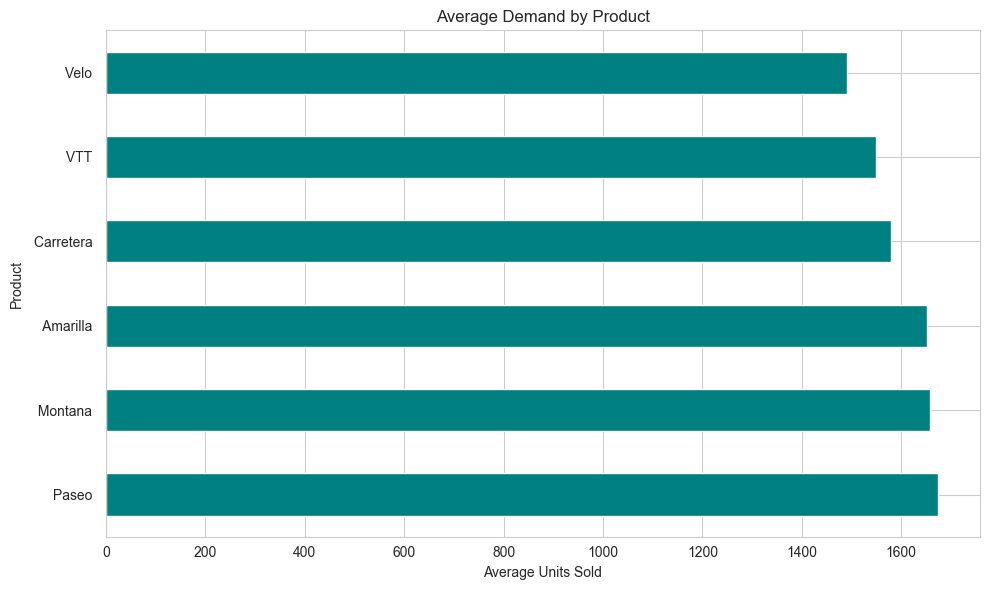

In [17]:
# Demand by Product

plt.figure(figsize=(10, 6))
product_demand = df.groupby('Product')['Units Sold'].mean().sort_values(ascending=False)
product_demand.plot(kind='barh', color='teal')
plt.xlabel('Average Units Sold')
plt.title('Average Demand by Product')
plt.tight_layout()
plt.show()

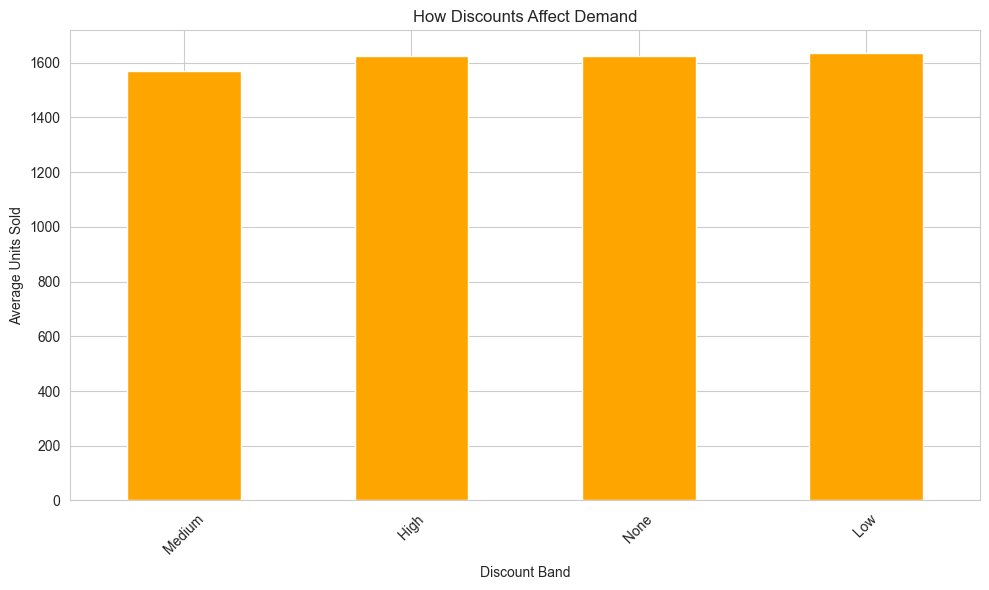

In [18]:
#  Demand by Discount Band

plt.figure(figsize=(10, 6))
discount_demand = df.groupby('Discount Band')['Units Sold'].mean().sort_values()
discount_demand.plot(kind='bar', color='orange')
plt.xlabel('Discount Band')
plt.ylabel('Average Units Sold')
plt.title('How Discounts Affect Demand')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()